In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/data.csv')

In [ ]:
data.shape

(170653, 19)

In [ ]:
year = pd.read_csv('/content/data_by_year.csv')

In [ ]:
year.shape

(100, 14)

In [ ]:
data.columns


Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
na_count = data.isna().sum()
na_count


,0
valence,0
year,0
acousticness,0
artists,0
danceability,0
duration_ms,0
energy,0
explicit,0
id,0
instrumentalness,0


In [ ]:
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


#Feature Correlation by Pearson, Spearman, Kendall

Normality Check:
acousticness: Not Normal
danceability: Not Normal
energy: Not Normal
instrumentalness: Not Normal
liveness: Not Normal
loudness: Not Normal
speechiness: Not Normal
tempo: Not Normal
valence: Not Normal
duration_ms: Not Normal
explicit: Not Normal
key: Not Normal
mode: Not Normal
year: Not Normal


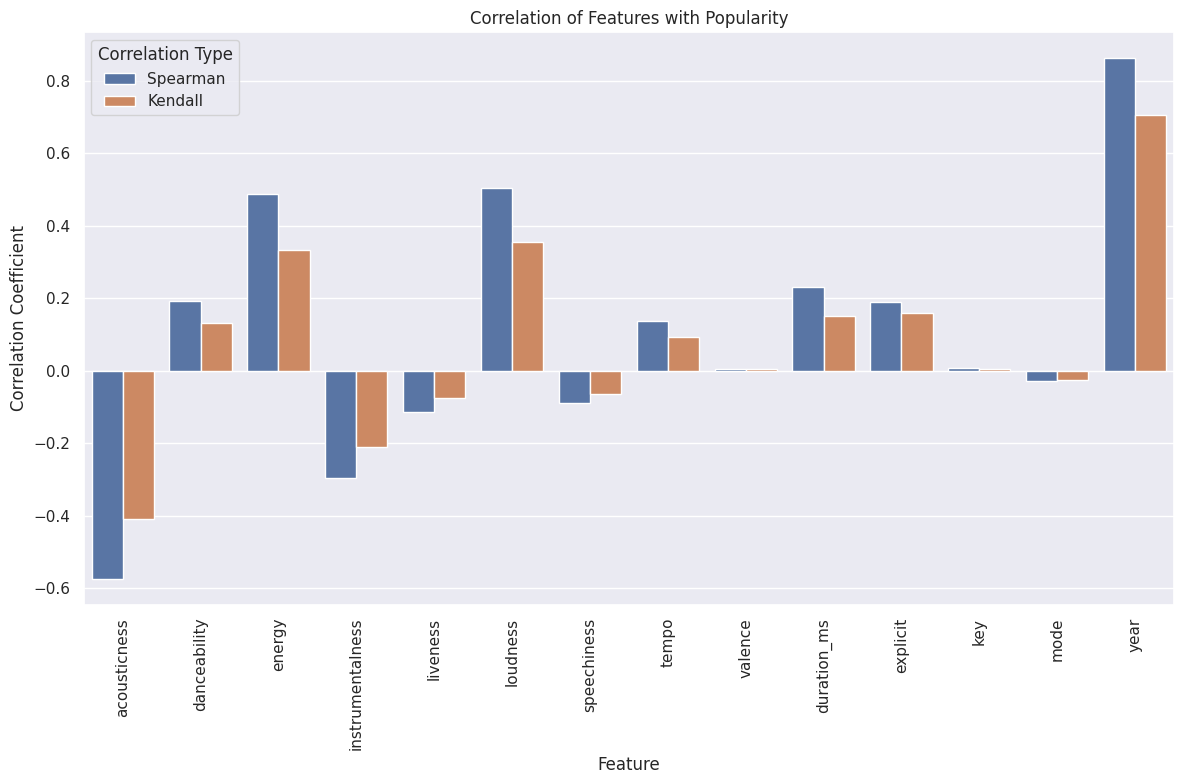

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau

# Load the dataset
data = pd.read_csv('/content/data.csv')

# List of feature names
feature_names = [
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
    'duration_ms', 'explicit', 'key', 'mode', 'year'
]

# Target variable
target = 'popularity'

# Step 1: Check normality using skewness and kurtosis
normality_results = {}
for feature in feature_names:
    skewness = data[feature].skew()
    kurtosis = data[feature].kurt()
    is_normal = abs(skewness) < 0.5 and 2 < kurtosis < 3
    normality_results[feature] = "Normal" if is_normal else "Not Normal"

# Print normality results
print("Normality Check:")
for feature, result in normality_results.items():
    print(f"{feature}: {result}")

# Step 2: Compute Correlations
correlation_results = []

for feature in feature_names:
    # Pearson Correlation
    #pearson_corr, p_value = pearsonr(data[feature], data[target])

    # Spearman Correlation
    spearman_corr, p_value = spearmanr(data[feature], data[target])

    # Kendall Correlation
    kendall_corr, p_value = kendalltau(data[feature], data[target])

    # Append results
    correlation_results.append({
        "Feature": feature,
        #"Pearson": pearson_corr,
        "Spearman": spearman_corr,
        "Kendall": kendall_corr
    })

# Create a DataFrame from correlation_results
correlation_df = pd.DataFrame(correlation_results)

# Step 3: Visualization
correlation_df_melted = correlation_df.melt(id_vars="Feature",
                                            value_vars=[ "Spearman", "Kendall"],
                                            var_name="Correlation Type",
                                            value_name="Value")

plt.figure(figsize=(12, 8))
sns.barplot(data=correlation_df_melted, x="Feature", y="Value", hue="Correlation Type")
plt.xticks(rotation=90)
plt.title("Correlation of Features with Popularity")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Feature")
plt.legend(title="Correlation Type")
plt.tight_layout()
plt.show()


#Data Understanding by Visualization and EDA



- Using the data grouped by year, we can understand how the overall sound of music has changed from 1921 to 2020.

<Axes: xlabel='count', ylabel='decade'>

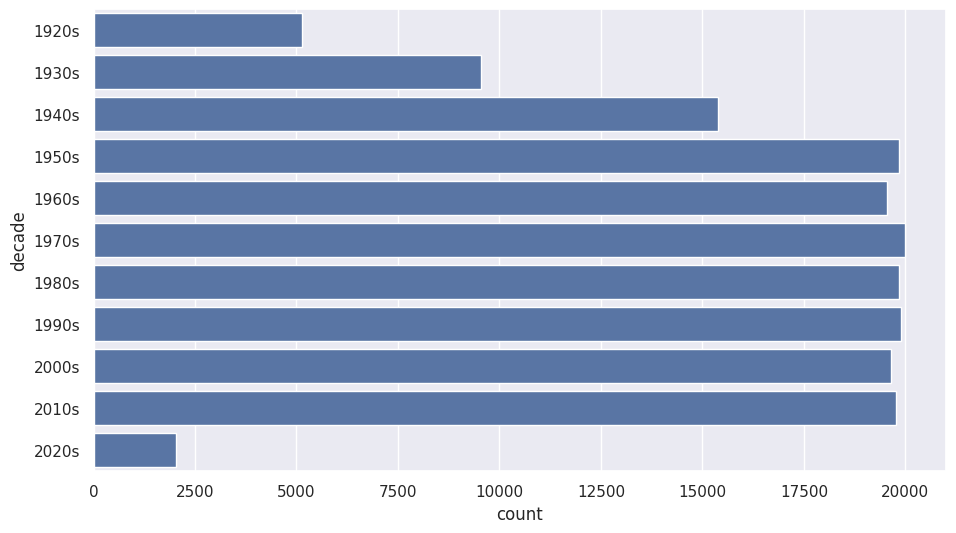

In [ ]:
def get_decade(year): #year from data.csv
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data['decade'])

In [ ]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year, x='year', y=sound_features)  #from year  we taken from year csv
fig.show()

# Elbow Method for Right K

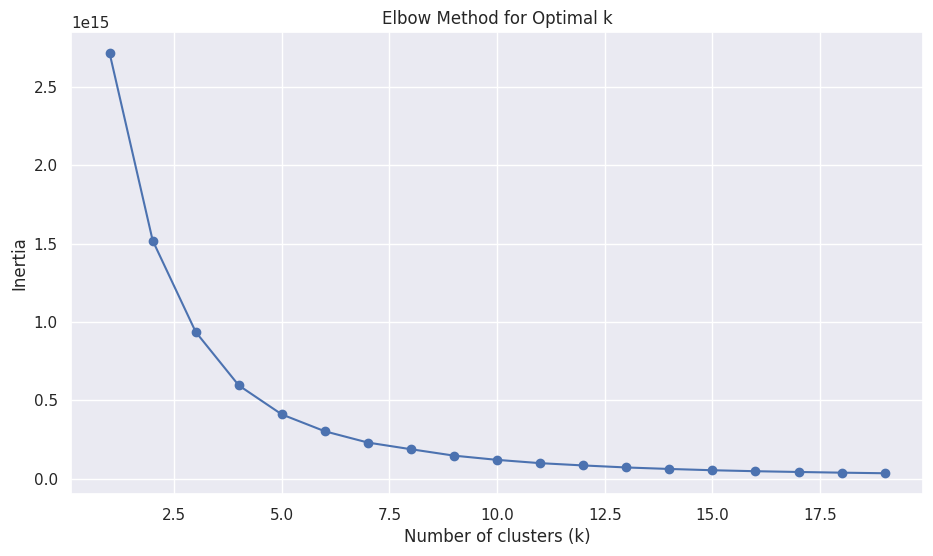

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Calculate inertia for different k values
inertia = []
k_range = range(1,20)
X = data.select_dtypes(include=np.number)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, verbose=False)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Model Building

In [ ]:
data = pd.read_csv("/content/data.csv")
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()),
                                  ('kmeans', KMeans(n_clusters=5,random_state =42,
                                   verbose=False))
                                 ], verbose=False)

X = data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data['cluster_label'] = song_cluster_labels


In [ ]:
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster_label
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,4
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339,0
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109,4
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029,1
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936,1
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688,1
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055,3


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def get_similarities(song_name, data):
    num_array1 = data[data['name'] == song_name].select_dtypes(include=np.number).to_numpy()
    input_song_cluster = data[data['name'] == song_name]['cluster_label'].iloc[0]
    cluster_data = data[data['cluster_label'] == input_song_cluster]

    sim = []
    for idx, row in cluster_data.iterrows():
        name = row['name']
        num_array2 = cluster_data[cluster_data['name'] == name].select_dtypes(include=np.number).to_numpy()
        num_sim = cosine_similarity(num_array1, num_array2)[0][0]
        sim.append((name, num_sim))

    return sim


In [ ]:
def recommend_songs(song_name, data=data):
  # Base case
  if data[data['name'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you have entered invalid_name.\n Some songs you may like:\n')

    for song in data.sample(n=5)['name'].values:
      print(song)
    return

  input_song_cluster = data[data['name'] == song_name]['cluster_label'].iloc[0]
  cluster_data = data[data['cluster_label'] == input_song_cluster]

  cluster_data['similarity_factor'] = get_similarities(song_name, data)

  cluster_data.sort_values(by=['similarity_factor', 'popularity'],
                   ascending = [False, False],
                   inplace=True)

  # First song will be the input song itself as the similarity will be highest.

  #display(cluster_data[['name', 'artists']][1:20].reset_index(drop=True))
  display(cluster_data[cluster_data['name'].apply(lambda x: x.isascii())][1:11][['name', 'artists']].reset_index(drop=True))


In [ ]:
recommend_songs('Shape of You')

,name,artists
0,you should see me in a crown,['Billie Eilish']
1,you broke me first,['Tate McRae']
2,xanny,['Billie Eilish']
3,witchblades,"['Lil Peep', 'Lil Tracy']"
4,wish you were gay,['Billie Eilish']
5,winter in rio,['Wun Two']
6,whoa (mind in awe),['XXXTENTACION']
7,when the party's over - Recorded at Spotify St...,['Lewis Capaldi']
8,what are you so afraid of,['XXXTENTACION']
9,west side,['Ariana Grande']


In [87]:
import pickle
pickle.dump(data,open('data.pkl','wb'))
pickle.dump(song_cluster_pipeline,open('song_cluster_pipeline.pkl','wb'))